In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
def load_pickle(fn):
    with open(fn, 'rb') as f:
        return pickle.load(f)

    
"""
simulation_{train, valid, test} is stored as a list of simulations. 
Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
"""
simulation_train = load_pickle('data/train/simulation.pickle')  # 2.1 + 2.2
simulation_valid = load_pickle('data/valid/simulation.pickle')  # 2.1 + 2.2
simulation_test = load_pickle('data/test/simulation.pickle')  # 2.1 + 2.2

"""
charges_{train, valid, test} is stored as a list of simulation-charges. 
These charges are stored as numpy arrays of size (3,): One value for each charge.
"""
charges_train = load_pickle('data/train/charges.pickle')  # 2.1
charges_valid = load_pickle('data/valid/charges.pickle')  # 2.1
charges_test = load_pickle('data/test/charges.pickle')  # 2.1

"""
simulation_continued_{train, valid, test} is stored as a list of simulations. 
Each simulation is a numpy array of size (t, 2): For t timesteps an x and y coordinate of our particle.
"""
simulation_continued_train = load_pickle('data/train/simulation_continued.pickle')  # 2.2
simulation_continued_valid = load_pickle('data/valid/simulation_continued.pickle')  # 2.2
simulation_continued_test = load_pickle('data/test/simulation_continued.pickle')  # 2.2

"""
Note that the indices are shared throughout the different lists, e.g., for the 4th training simulation:
simulation_train[3] contains its initial simulation
charges_train[3] contains the charges associated with the simulation
simulation_continued_train[3] contains the continuation of the simulation 
                --> simulation_continued_train[3][0] is the state after simulation_train[3][-1]
"""
pass

In [3]:
print('Overview of no. datapoints:\n')

print('Task 2.1:')
print(f'{len(simulation_train)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(charges_train)} train, {len(charges_valid)} validation, {len(charges_test)} test charge pairs')
print()

print('Task 2.2:')
print('Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations')
print('We cut simulation_train down to the first 150 samples in simulation_train_task2')
simulation_train_task2 = simulation_train[:150]
print(f'{len(simulation_train_task2)} train, {len(simulation_valid)} validation, {len(simulation_test)} test simulations')
print(f'{len(simulation_continued_train)} train, {len(simulation_continued_valid)} validation, {len(simulation_continued_test)} test continuations')

print(f"""
For task 2.1, use:
{chr(10).join(["simulation_{} + charges_{}".format(t, t) for t in ["train", "valid", "test"]])}

For task 2.2, use:
{chr(10).join(["simulation_{} + simulation_continued_{}".format(*((t[0], t[1]) if isinstance(t, tuple) else (t, t))) for t in [("train_task2", "train"), "valid", "test"]])}
""")


Overview of no. datapoints:

Task 2.1:
800 train, 100 validation, 100 test simulations
800 train, 100 validation, 100 test charge pairs

Task 2.2:
Since len(simulation_continued_train) < len(simulation_train), we can only use a subset of initial simulations
We cut simulation_train down to the first 150 samples in simulation_train_task2
150 train, 100 validation, 100 test simulations
150 train, 100 validation, 100 test continuations

For task 2.1, use:
simulation_train + charges_train
simulation_valid + charges_valid
simulation_test + charges_test

For task 2.2, use:
simulation_train_task2 + simulation_continued_train
simulation_valid + simulation_continued_valid
simulation_test + simulation_continued_test



In [4]:
print('Print some shapes:\n')
for i in range(3):
    print('simulation_train[{}].shape:'.format(i), simulation_train[i].shape, '-> (t, 2), (x, y) at every t)')
    print('charges_train[{}].shape:'.format(i), charges_train[i].shape, '-> charges for the simulation')
    print('simulation_continued_train[{}].shape:'.format(i), simulation_continued_train[i].shape, '-> (t, 2), (x, y) at every t)')
    print('----\n')

Print some shapes:

simulation_train[0].shape: (103, 2) -> (t, 2), (x, y) at every t)
charges_train[0].shape: (3,) -> charges for the simulation
simulation_continued_train[0].shape: (54, 2) -> (t, 2), (x, y) at every t)
----

simulation_train[1].shape: (97, 2) -> (t, 2), (x, y) at every t)
charges_train[1].shape: (3,) -> charges for the simulation
simulation_continued_train[1].shape: (45, 2) -> (t, 2), (x, y) at every t)
----

simulation_train[2].shape: (99, 2) -> (t, 2), (x, y) at every t)
charges_train[2].shape: (3,) -> charges for the simulation
simulation_continued_train[2].shape: (47, 2) -> (t, 2), (x, y) at every t)
----



In [5]:
def plot_example(x, x_gt=None, x_pred=None, fn=None):
    charge_locations = np.array([[-1.53846154, -1.53846154],
                                 [ 1.53846154, -1.53846154],
                                 [ 0.        ,  1.53846154]])  # charge locations are fixed
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    cmap = matplotlib.cm.get_cmap('tab20')
    plt.plot(x[:, 0], x[:, 1], color=cmap(0))
    plt.plot(x[0, 0], x[0, 1], 'd', color=cmap(1))
    fig.set_size_inches(5, 5)
    for charge in charge_locations:
        plt.plot(charge[0], charge[1], 'd', color='black')
    if x_gt is not None:
        plt.plot(x_gt[:, 0], x_gt[:, 1], color='red', linewidth=.5)
    if x_pred is not None:
        plt.plot(x_pred[:, 0], x_pred[:, 1], color='green', linestyle='--')
    if fn is None:
        plt.show()
    else:
        plt.savefig(fn)

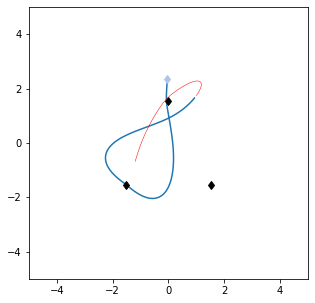

Charges are [-0.64527653 -0.21612742 -0.96768868]


In [6]:
test_idx = np.random.randint(150)
plot_example(simulation_train[test_idx], simulation_continued_train[test_idx])
print(f'Charges are {charges_train[test_idx]}')

In [7]:
print(simulation_train[1])    #simulation guiji meiyou shijian jiushi 
print(charges_train[1])    #simulation 电荷量     

[[ 0.02131423  2.35724041]
 [ 0.01356607  2.24387129]
 [ 0.00420025  2.12108046]
 [-0.00678935  1.98838994]
 [-0.019345    1.84509386]
 [-0.03316281  1.68998654]
 [-0.04569477  1.52087837]
 [-0.05098776  1.3476034 ]
 [-0.05572069  1.17636925]
 [-0.06173123  1.00516443]
 [-0.06955289  0.83292671]
 [-0.0795167   0.65898979]
 [-0.09190119  0.48288669]
 [-0.1069783   0.30427434]
 [-0.12503515  0.12290132]
 [-0.14638869 -0.06140382]
 [-0.17139863 -0.24873149]
 [-0.20048025 -0.43907958]
 [-0.23411727 -0.63233133]
 [-0.27287219 -0.8282211 ]
 [-0.31738828 -1.02628629]
 [-0.36837069 -1.22580552]
 [-0.42652783 -1.42573142]
 [-0.49245285 -1.62464457]
 [-0.56644729 -1.82078023]
 [-0.64834448 -2.01218202]
 [-0.73744086 -2.19697056]
 [-0.83260259 -2.37361106]
 [-0.93248927 -2.54104924]
 [-1.03576812 -2.69869019]
 [-1.1412431  -2.84629052]
 [-1.24790083 -2.98383903]
 [-1.35490662 -3.11146232]
 [-1.46157995 -3.22936108]
 [-1.56736569 -3.33777042]
 [-1.67180787 -3.43693662]
 [-1.77452802 -3.52710402]
 

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


E:\anaconda3\envs\py38cuda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
batch_size = 20
time_step = 1
epoch = 500
input_size = 2
output_size = 3
mid_dim = 8
mid_layers = 1

In [10]:

 
class Model(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers,batch):
        super(Model, self).__init__()
 
        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers,batch_first=batch)  # rnn
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim),
            nn.Tanh(),
            nn.Linear(mid_dim, out_dim),
        )  # regression
 
    def forward(self, x):
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)
 
        batch_size, seq_len, hid_dim = y.shape
        y = y.reshape(-1, hid_dim)
        y = self.reg(y)
        y = y.reshape(batch_size, seq_len, -1)
        return y

In [11]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
net=Model(input_size,output_size,mid_dim,mid_layers,True).to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(),lr=1e-2)


In [ ]:

for i in range(epoch):
    for j in range(len(simulation_train)/batch_size):
        train_X=simulation_train[j*batch_size:(j+1)*batch_size,:,:]
        train_Y=charges_train[j*batch_size:(j+1)*batch_size,:,:]
        var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
        var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
        out = net(var_x)
        loss=criterion(out,var_y)
        #loss = criterion(out[:,-1,:], var_y[:,-1,:])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_X=data_sample[(j+1)*batch_size:,:,:]
    train_Y=label_sample[(j+1)*batch_size:,:,:]
    var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
    var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
    out = net(var_x)
    loss = criterion(out, var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100==0:
        print('Epoch: {:4}, Loss: {:.5f}'.format(i, loss.item()))


In [ ]:
for i in range(epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [17]:
test = simulation_train[1:3][:90]

print(len(test[0]))
print(len(test[1]))

97
99
